<a href="https://colab.research.google.com/github/Rogiervanweert/CoronaWatchNL/blob/master/Covid_Plot_Log_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fatalitiesurl = "https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/data/rivm_corona_in_nl_fatalities.csv"
hospitalurl = "https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/data/rivm_corona_in_nl_hosp.csv"
totalurl = "https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/data/rivm_corona_in_nl_daily.csv"
niceurl = "https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/data/nice_ic_by_day.csv"

In [0]:
def read_data(url):
    
    # Read and preprocess data file
    df = pd.read_csv(url)

    df['Datum'] = pd.to_datetime(df['Datum'])

    df['Dag'] = np.arange(len(df))

    df = df.set_index('Datum')
    
    return (df)  


In [0]:
def read_nicedata(url):
    
    # Read and preprocess data file'
    nice = pd.read_csv(url)
    
    nice['Datum'] = pd.to_datetime(nice['Datum'])

    nice['Dag'] = np.arange(len(nice))

    nice = nice.set_index('Datum')
    
    nice['intakeCumulative_EMA'] = pd.Series.ewm(nice['intakeCumulative'], span=RolAVG).mean()
    nice['New_EMA'] = pd.Series.ewm(nice['newIntake'], span=RolAVG).mean()
    nice['NewDead']= nice.diedCumulative.diff()
    nice['NewDead_EMA']= pd.Series.ewm(nice['NewDead'], span=RolAVG).mean()
    nice['diedCumulative_EMA']= pd.Series.ewm(nice['diedCumulative'], span=RolAVG).mean()
    nice['NewSurvived']= nice.survivedCumulative.diff()
    nice['NewSurvived_EMA']= pd.Series.ewm(nice['NewSurvived'], span=RolAVG).mean()
    nice['survivedCumulative_EMA'] = pd.Series.ewm(nice['survivedCumulative'], span=RolAVG).mean()
    nice['IntakeCount_EMA'] = pd.Series.ewm(nice['intakeCount'], span=RolAVG).mean()
    
    return (nice)  


In [0]:
def add_variables(df):


    # New cases
    df['New_cases'] = df.Aantal.diff()

    # Groeifactor
    df['Growth_factor'] = df['New_cases'] / df['New_cases'].shift(1)    

    #EWM
    df['Total_EMA'] = pd.Series.ewm(df['Aantal'], span=RolAVG).mean()
    df['New_EMA'] = pd.Series.ewm(df['New_cases'], span=RolAVG).mean()
    
    return(df)


In [0]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]+str("= ")+str(int(df['New_cases'][df.index[-1]]))+str(" /Dif: ")+str(int(df['New_cases'][df.index[-1]])-int(df['New_cases'][df.index[-2]]))+str(" / ")+str(df['Aantal'][df.index[-1]])
    return name

In [0]:
def create_logarithmic_growth_plot(df,df1,df2,df3):
    # Setup Object Oriented plot because we re-use this function
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set(xscale="log", yscale="log" )
    ax.set_xlabel("Totaal cases", fontsize=15)
    ax.set_ylabel("Nieuwe cases", fontsize=15)
    #ax.set_xlim(100, 50000)
    #ax.set_ylim(1, 5000)

    ax.grid(which='major', linewidth=1)
    ax.grid(which='minor', linewidth=0.1)

    ax.plot(df['Total_EMA'], df["New_EMA"],label = get_df_name(df))
    ax.plot(df1['Total_EMA'], df1["New_EMA"],label = get_df_name(df1))
    ax.plot(df2['Total_EMA'], df2["New_EMA"],label = get_df_name(df2))
    ax.plot(df3['intakeCumulative_EMA'],df3['IntakeCount_EMA'],label = "TotalonIC= "+str(int(nice['intakeCount'][nice.index[-1]]))+str(" /Dif: ")+str(int(nice['intakeCount'][nice.index[-1]])-int(nice['intakeCount'][nice.index[-2]]))+str(" / ")+str(nice['intakeCumulative'][nice.index[-1]]))
    ax.plot(df3['intakeCumulative_EMA'], df3["New_EMA"],label = "NewonIC= "+str(int(nice['newIntake'][nice.index[-1]]))+str(" /Dif: ")+str(int(nice['newIntake'][nice.index[-1]])-int(nice['newIntake'][nice.index[-2]]))+str(" / ")+str(nice['intakeCumulative'][nice.index[-1]]))
    ax.plot(df3['diedCumulative_EMA'], df3["NewDead_EMA"],label = "Dead on ICE= "+str(int(nice['NewDead'][nice.index[-1]]))+str(" /Dif: ")+str(int(nice['NewDead'][nice.index[-1]])-int(nice['NewDead'][nice.index[-2]]))+str(" / ")+str(nice['diedCumulative'][nice.index[-1]]))
    ax.plot(df3['survivedCumulative_EMA'], df3["NewSurvived_EMA"],label = "Survived ICE= "+str(int(nice['NewSurvived'][nice.index[-1]]))+str(" /Dif: ")+str(int(nice['NewSurvived'][nice.index[-1]])-int(nice['NewSurvived'][nice.index[-2]]))+str(" / ")+str(nice['survivedCumulative'][nice.index[-1]]))
    ax.legend()     
    return fig,ax


In [0]:
def plot_logarithmic_growth_daily(df,df1,df2,df3):
    fig, ax = create_logarithmic_growth_plot(df,df1,df2,df3)
    ax.set(title="Nieuwe cases tegen totaal cases (7 daags gemiddelde)")

    fig.savefig("exponential_growth_daily.png")

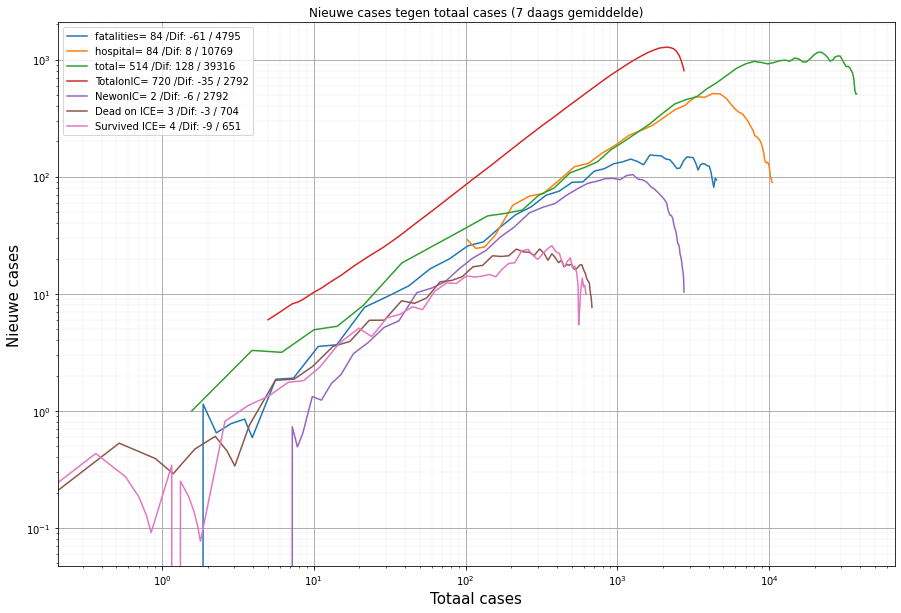

In [209]:
if __name__ == "__main__":
    #rolling avg
    RolAVG = 7

    fatalities = read_data(fatalitiesurl)
    fatalities = add_variables(fatalities)
    hospital = read_data(hospitalurl)
    hospital = add_variables(hospital)
    total = read_data(totalurl)
    total = add_variables(total)
    nice = read_nicedata(niceurl)
    plot_logarithmic_growth_daily(fatalities,hospital,total,nice)


In [210]:
fatalities.tail(7)

,Aantal,Dag,New_cases,Growth_factor,Total_EMA,New_EMA
Datum,,,,,,
2020-04-24,4289,49,112.0,0.910569,3917.068507,123.977997
2020-04-25,4409,50,120.0,1.071429,4040.051432,122.983497
2020-04-26,4475,51,66.0,0.550000,4148.788609,108.737617
2020-04-27,4518,52,43.0,0.651515,4241.091479,92.303207
2020-04-28,4566,53,48.0,1.116279,4322.318624,81.227403
2020-04-29,4711,54,145.0,3.020833,4419.488981,97.170555
2020-04-30,4795,55,84.0,0.579310,4513.366745,93.877916


In [211]:
hospital.tail(7)

,Aantal,Dag,New_cases,Growth_factor,Total_EMA,New_EMA
Datum,,,,,,
2020-04-24,10281,43,123.0,0.897810,9890.375902,130.218984
2020-04-25,10381,44,100.0,0.813008,10013.032219,122.664214
2020-04-26,10456,45,75.0,0.750000,10123.774363,110.748132
2020-04-27,10521,46,65.0,0.866667,10223.080905,99.311079
2020-04-28,10609,47,88.0,1.353846,10319.560776,96.483305
2020-04-29,10685,48,76.0,0.863636,10410.920651,91.362474
2020-04-30,10769,49,84.0,1.105263,10500.440539,89.521854


In [212]:
total.tail(7)

,Aantal,Dag,New_cases,Growth_factor,Total_EMA,New_EMA
Datum,,,,,,
2020-04-24,36535,57,806.0,0.908681,33960.376177,858.208648
2020-04-25,37190,58,655.0,0.812655,34767.782167,807.406483
2020-04-26,37845,59,655.0,1.000000,35537.086650,769.304861
2020-04-27,38245,60,400.0,0.610687,36214.065003,676.978643
2020-04-28,38416,61,171.0,0.427500,36764.548762,550.483979
2020-04-29,38802,62,386.0,2.257310,37273.911579,509.362983
2020-04-30,39316,63,514.0,1.331606,37784.433689,510.522238


In [213]:
nice.tail(7)


,icCount,newIntake,intakeCount,intakeCumulative,survivedCumulative,diedCumulative,Dag,intakeCumulative_EMA,New_EMA,NewDead,NewDead_EMA,diedCumulative_EMA,NewSurvived,NewSurvived_EMA,survivedCumulative_EMA,IntakeCount_EMA
Datum,,,,,,,,,,,,,,,,
2020-04-24,75,16,878,2714,573,660,57,2641.039391,19.694326,12.0,15.022036,614.933930,-14.0,5.426419,556.720776,972.153822
2020-04-25,75,14,847,2729,585,669,58,2663.029544,18.270744,9.0,13.516527,628.450448,12.0,7.069814,563.790582,940.865365
2020-04-26,75,12,827,2744,607,680,59,2683.272159,16.703058,11.0,12.887395,641.337836,22.0,10.802361,574.592937,912.399023
2020-04-27,75,13,803,2760,629,691,60,2702.454119,15.777294,11.0,12.415546,653.753378,22.0,13.601771,588.194703,885.049266
2020-04-28,75,12,780,2775,634,695,61,2720.590590,14.832970,4.0,10.311660,664.065033,5.0,11.451328,599.646027,858.786949
2020-04-29,74,8,755,2789,647,701,62,2737.692943,13.124728,6.0,9.233745,673.298775,13.0,11.838496,611.484521,832.840212
2020-04-30,74,2,720,2792,651,704,63,2751.269707,10.343546,3.0,7.675309,680.974081,4.0,9.878872,621.363391,804.630158
